# Milestone #3: Brett Pfliger

## How did the Buffalo Sabers and Vancouver Canucks play before and after their Covid-19 outbreaks and is there any correlation?

I am a huge hockey fan and am curious to see how the Buffalo Sabers and Vancouver Canucks played after their Covid-19 outbreaks. Both of these teams experianced the most time off due to their outbreaks compared to many other teams and I want to see if that resulted in them playing worse when coming back. 

In [2]:
import pandas as pd
data = pd.read_csv("../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
data

,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,SCF,SCA,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,Limited ReportFull Report,45.583333,33,34,49.25,19,24,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,Limited ReportFull Report,45.583333,34,33,50.75,24,19,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,Limited ReportFull Report,50.683333,44,43,50.57,11,22,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,Limited ReportFull Report,50.683333,43,44,49.43,22,11,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,Limited ReportFull Report,48.600000,47,52,47.47,25,30,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,Limited ReportFull Report,40.966667,32,50,39.02,17,19,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,Limited ReportFull Report,47.416667,43,37,53.75,25,17,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,Limited ReportFull Report,47.416667,37,43,46.25,17,25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,Limited ReportFull Report,44.483333,43,35,55.13,30,18,62.50,24.00,94.44,1.184


# Task 1

## Conducting an EDA:

In [3]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

print("How many rows and columns are there:", data.shape)
print("Columns included in this dataset:", data.columns)

How many rows and columns are there: (1736, 13)
Columns included in this dataset: Index(['Game', 'Team', 'Unnamed: 2', 'TOI', 'CF', 'CA', 'CF%', 'SCF', 'SCA',
       'SCF%', 'SH%', 'SV%', 'PDO'],
      dtype='object')


In [4]:
data.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
TOI,1736.0,48.557661,4.241102,31.783333,45.6625,48.933333,51.500,68.200
CF%,1736.0,50.000035,8.153142,25.270000,44.1600,50.000000,55.840,74.730
SCF%,1736.0,50.000063,10.623748,14.810000,43.1700,50.000000,56.830,85.190
SH%,1736.0,8.458710,6.235143,0.000000,4.1700,7.690000,12.500,50.000
SV%,1736.0,91.541394,6.235157,50.000000,87.5000,92.310000,95.830,100.000
PDO,1736.0,1.000009,0.091223,0.553000,0.9420,1.000000,1.058,1.447


In [5]:
data.describe(include='object').T

,count,unique,top,freq
Game,1736,868,"2021-01-13 - Blackhawks 1, Lightning 5",2
Team,1736,31,Chicago Blackhawks,56
Unnamed: 2,1736,1,Limited ReportFull Report,1736


# Task 2

## Analysis Pipline:

In [6]:
df = data.drop(columns =['CF','CA','SCF','SCA','TOI', 'Unnamed: 2'])
df.shape

(1736, 7)

### In this step, 
- I dropped the columns of 'CF', 'CA', 'SCF', 'SCA', 'PDO', 'Unnamed: 2' as we don't need them

In [7]:
Canucks = df.drop(data[data.Team.isin(["Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks"])].index)
Canucks1 = Canucks.reset_index()
Canucks2 = Canucks1.drop(Canucks1.index[0:27]).drop(Canucks1.index[47:56])
Canucks3 = Canucks2.reset_index().drop(columns = "index")
Canucks4 = Canucks3.drop(columns =['level_0'])
CanucksBefore = Canucks4.drop(Canucks3.index[10:20])
CanucksAfter = Canucks4.drop(Canucks3.index[0:10]).drop(Canucks3.index[20:20])

### In this step for the Vancouver Canucks,
- I dropped all the teams except the Vancouver Canucks to create its own dataframe
- Reset index to make it easier to drop games that arn't needed 
- Dropped all of the games that arn't needed. Know we have Vancouvers 10 games before and 10 games after their outbreak
- Reset index to make it easier to analyze Vancouvers Games and droped the column it added of 'level_0'
- This dataframe gives me the 10 games before the Vancouver Canucks Covid outbreak
- This dataframe gives me the 10 games after the Vancouver Canucks Covid outbreak

In [8]:
Sabres = df.drop(data[data.Team.isin(["Arizona Coyotes", "Vancouver Canucks",  "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks"])].index)
Sabres1 = Sabres.reset_index()
Sabres2 = Sabres1.drop(Sabres1.index[20:])
SabresBefore = Sabres2.drop(Sabres2.index[10:20])
SabresAfter = Sabres2.drop(Sabres2.index[0:10]).drop(Sabres2.index[20:])

### In this step for the Buffalo Sabres, 
- I dropped all of the teams except the Buffalo Sabres to create its own dataframe
- Reset index to make it easier to drop games that arn't needed for the Buffalo Sabres
- Dropped all of the games that arn't needed. Know we have Buffalos 10 games before and 10 games after their outbreak
- This dataframe gives me the 10 games before the buffalo Sabres Covid outbreak
- This dataframe gives me the 10 games after the Buffalo Sabres Covid outbreak 

# Task 3

## Method Chaining: 

In [9]:
import project_functions1 as pf1

In [10]:
DataFrameProcessed = pf1.load_and_process(path_to_csv_file = "../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
DataFrameProcessed

,Game,Team,CF%,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,49.25,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,50.75,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,50.57,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,49.43,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,47.47,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,39.02,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,53.75,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,46.25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,55.13,62.50,24.00,94.44,1.184


In [22]:
CanucksBeforeFinal = pf1.Canucks_Before_Data(DataFrameProcessed)
CanucksBeforeFinal

,Game,Team,CF%,SCF%,SH%,SV%,PDO
0,"2021-03-06 - Maple Leafs 2, Canucks 4",Vancouver Canucks,42.48,41.51,8.00,94.59,1.026
1,"2021-03-08 - Canadiens 1, Canucks 2",Vancouver Canucks,39.58,40.00,0.00,100.00,1.000
2,"2021-03-10 - Canadiens 5, Canucks 1",Vancouver Canucks,34.69,24.00,0.00,89.19,0.892
3,"2021-03-13 - Oilers 1, Canucks 2",Vancouver Canucks,46.81,41.03,5.00,100.00,1.050
4,"2021-03-15 - Canucks 3, Senators 2",Vancouver Canucks,40.35,40.32,7.69,97.62,1.053
5,"2021-03-17 - Canucks 3, Senators 2",Vancouver Canucks,38.68,37.50,7.69,92.31,1.000
6,"2021-03-19 - Canucks 3, Canadiens 2",Vancouver Canucks,46.15,42.86,8.00,100.00,1.080
7,"2021-03-20 - Canucks 4, Canadiens 5",Vancouver Canucks,32.04,22.92,23.08,91.18,1.143
8,"2021-03-22 - Jets 4, Canucks 0",Vancouver Canucks,47.79,42.86,0.00,85.71,0.857
9,"2021-03-24 - Jets 5, Canucks 1",Vancouver Canucks,62.11,62.22,3.13,91.30,0.944


In [23]:
CanucksAfterFinal = pf1.Canucks_After_Data(DataFrameProcessed)
CanucksAfterFinal

,Game,Team,CF%,SCF%,SH%,SV%,PDO
10,"2021-04-18 - Maple Leafs 2, Canucks 3",Vancouver Canucks,35.87,33.33,12.50,96.77,1.093
11,"2021-04-20 - Maple Leafs 3, Canucks 6",Vancouver Canucks,50.53,45.83,16.00,96.97,1.130
12,"2021-04-22 - Senators 3, Canucks 0",Vancouver Canucks,59.26,55.00,0.00,100.00,1.000
13,"2021-04-24 - Senators 2, Canucks 4",Vancouver Canucks,42.53,32.43,8.70,88.89,0.976
14,"2021-04-26 - Canucks 1, Senators 2",Vancouver Canucks,44.05,30.00,4.55,91.67,0.962
15,"2021-04-28 - Canucks 3, Senators 6",Vancouver Canucks,40.22,28.95,16.67,81.48,0.981
16,"2021-04-29 - Canucks 1, Maple Leafs 4",Vancouver Canucks,42.55,40.00,0.00,83.33,0.833
17,"2021-05-01 - Canucks 1, Maple Leafs 5",Vancouver Canucks,52.27,48.98,4.35,86.21,0.906
18,"2021-05-03 - Oilers 5, Canucks 3",Vancouver Canucks,40.20,37.25,10.00,87.10,0.971
19,"2021-05-04 - Oilers 4, Canucks 1",Vancouver Canucks,48.28,42.86,4.55,90.48,0.950


In [24]:
SabresBeforeFinal = pf1.Sabres_Before_Data(DataFrameProcessed)
SabresBeforeFinal

,Game,Team,CF%,SCF%,SH%,SV%,PDO
0,"2021-01-14 - Capitals 6, Sabres 4",Buffalo Sabres,51.47,55.17,10.53,80.95,0.915
1,"2021-01-15 - Capitals 2, Sabres 1",Buffalo Sabres,51.43,55.56,4.55,90.48,0.950
2,"2021-01-18 - Sabres 6, Flyers 1",Buffalo Sabres,49.00,54.55,12.90,95.24,1.081
3,"2021-01-19 - Sabres 0, Flyers 3",Buffalo Sabres,59.38,58.14,0.00,91.67,0.917
4,"2021-01-22 - Sabres 3, Capitals 4",Buffalo Sabres,53.85,61.29,13.64,88.00,1.016
5,"2021-01-24 - Sabres 4, Capitals 3",Buffalo Sabres,56.18,42.86,0.00,94.74,0.947
6,"2021-01-26 - Rangers 2, Sabres 3",Buffalo Sabres,50.79,63.33,6.67,91.30,0.980
7,"2021-01-28 - Rangers 3, Sabres 2",Buffalo Sabres,41.67,37.04,5.00,96.15,1.012
8,"2021-01-30 - Devils 3, Sabres 4",Buffalo Sabres,49.32,51.72,10.00,90.48,1.005
9,"2021-01-31 - Devils 5, Sabres 3",Buffalo Sabres,43.75,36.36,4.35,88.24,0.926


In [28]:
SabresAfterFinal = pf1.Sabres_After_Data(DataFrameProcessed)
SabresAfterFinal

,Game,Team,CF%,SCF%,SH%,SV%,PDO
10,"2021-02-15 - Islanders 3, Sabres 1",Buffalo Sabres,44.05,37.93,0.00,92.00,0.920
11,"2021-02-16 - Islanders 3, Sabres 0",Buffalo Sabres,57.14,54.76,0.00,89.47,0.895
12,"2021-02-18 - Sabres 1, Capitals 3",Buffalo Sabres,48.78,44.74,0.00,94.12,0.941
13,"2021-02-20 - Sabres 3, Devils 2",Buffalo Sabres,50.00,52.63,7.41,95.45,1.029
14,"2021-02-22 - Sabres 2, Islanders 3",Buffalo Sabres,48.19,44.68,4.35,90.48,0.948
15,"2021-02-23 - Sabres 4, Devils 1",Buffalo Sabres,47.12,53.06,6.25,100.00,1.063
16,"2021-02-25 - Devils 4, Sabres 3",Buffalo Sabres,40.45,26.67,4.35,93.94,0.983
17,"2021-02-27 - Flyers 3, Sabres 0",Buffalo Sabres,45.98,50.00,0.00,90.32,0.903
18,"2021-02-28 - Flyers 3, Sabres 0",Buffalo Sabres,44.30,40.00,0.00,90.32,0.903
19,"2021-03-02 - Sabres 2, Rangers 3",Buffalo Sabres,63.22,60.00,10.53,82.35,0.929


In [29]:
CovidDescribeCBF = pf1.Describe(CanucksBeforeFinal)
CovidDescribeCBF

,count,mean,std,min,25%,50%,75%,max
CF%,10.0,43.0680,8.428510,32.040,38.9050,41.415,46.64500,62.110
SCF%,10.0,39.5220,10.879249,22.920,38.1250,40.675,42.52250,62.220
SH%,10.0,6.2590,6.847584,0.000,0.7825,6.345,7.92250,23.080
SV%,10.0,94.1900,5.066779,85.710,91.2100,93.450,99.40500,100.000
PDO,10.0,1.0045,0.086846,0.857,0.9580,1.013,1.05225,1.143


In [30]:
CovidDescribeCAF = pf1.Describe(CanucksAfterFinal)
CovidDescribeCAF

,count,mean,std,min,25%,50%,75%,max
CF%,10.0,45.5760,6.963981,35.870,40.7975,43.3000,49.96750,59.26
SCF%,10.0,39.4630,8.669128,28.950,32.6550,38.6250,45.08750,55.00
SH%,10.0,7.7320,6.039851,0.000,4.4000,6.6250,11.87500,16.67
SV%,10.0,90.2900,6.125335,81.480,86.4325,89.6850,95.49500,100.00
PDO,10.0,0.9802,0.084377,0.833,0.9530,0.9735,0.99525,1.13


In [31]:
CovidDescribeSBF = pf1.Describe(SabresBeforeFinal)
CovidDescribeSBF

,count,mean,std,min,25%,50%,75%,max
CF%,10.0,50.6840,5.281671,41.670,49.08000,51.110,53.25500,59.380
SCF%,10.0,51.6020,9.615050,36.360,45.07500,54.860,57.49500,63.330
SH%,10.0,6.7640,4.886915,0.000,4.40000,5.835,10.39750,13.640
SV%,10.0,90.7250,4.427581,80.950,88.80000,90.890,93.97250,96.150
PDO,10.0,0.9749,0.053733,0.915,0.93125,0.965,1.01025,1.081


In [32]:
CovidDescribeSAF = pf1.Describe(SabresAfterFinal)
CovidDescribeSAF

,count,mean,std,min,25%,50%,75%,max
CF%,10.0,48.9230,6.687160,40.450,44.72000,47.655,49.69500,63.220
SCF%,10.0,46.4470,9.767542,26.670,41.17000,47.370,52.95250,60.000
SH%,10.0,3.2890,3.866110,0.000,0.00000,2.175,5.77500,10.530
SV%,10.0,91.8450,4.611566,82.350,90.32000,91.240,94.07500,100.000
PDO,10.0,0.9514,0.056714,0.895,0.90725,0.935,0.97425,1.063


# Task 4

## Analysis To Answer Research Question:

### Vancouver Canucks Before Covid-19 Outbreak

In [114]:
CovidDescribeCBF

,count,mean,std,min,25%,50%,75%,max
CF%,10.0,43.0680,8.428510,32.040,38.9050,41.415,46.64500,62.110
SCF%,10.0,39.5220,10.879249,22.920,38.1250,40.675,42.52250,62.220
SH%,10.0,6.2590,6.847584,0.000,0.7825,6.345,7.92250,23.080
SV%,10.0,94.1900,5.066779,85.710,91.2100,93.450,99.40500,100.000
PDO,10.0,1.0045,0.086846,0.857,0.9580,1.013,1.05225,1.143


/var/folders/bj/1qb21b6n1nlcg8tl_ls_mjrm0000gn/T/ipykernel_54342/3557503599.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CanucksBeforeFinal.mean().plot(kind='bar')


<AxesSubplot:>

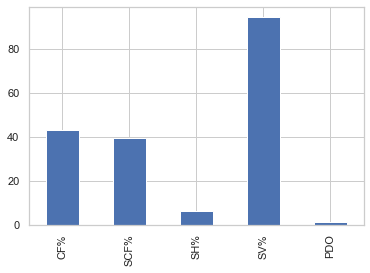

In [101]:
CanucksBeforeFinal.mean().plot(kind='bar')

<AxesSubplot:>

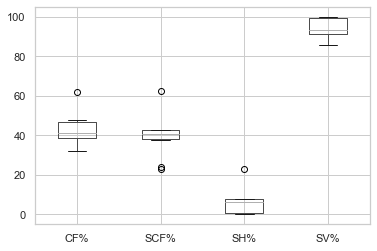

In [103]:
CanucksBeforeFinal.boxplot(['CF%','SCF%','SH%','SV%'])

<AxesSubplot:>

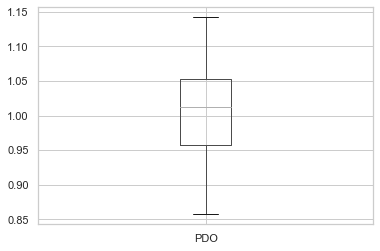

In [102]:
CanucksBeforeFinal.boxplot(['PDO'])

### Vancouver Canucks After Covid-19 Outbreak

In [115]:
CovidDescribeCAF

,count,mean,std,min,25%,50%,75%,max
CF%,10.0,45.5760,6.963981,35.870,40.7975,43.3000,49.96750,59.26
SCF%,10.0,39.4630,8.669128,28.950,32.6550,38.6250,45.08750,55.00
SH%,10.0,7.7320,6.039851,0.000,4.4000,6.6250,11.87500,16.67
SV%,10.0,90.2900,6.125335,81.480,86.4325,89.6850,95.49500,100.00
PDO,10.0,0.9802,0.084377,0.833,0.9530,0.9735,0.99525,1.13


/var/folders/bj/1qb21b6n1nlcg8tl_ls_mjrm0000gn/T/ipykernel_54342/3033741000.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CanucksAfterFinal.mean().plot(kind='bar')


<AxesSubplot:>

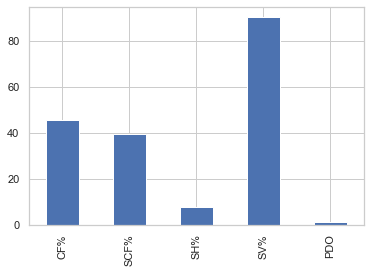

In [104]:
CanucksAfterFinal.mean().plot(kind='bar')

<AxesSubplot:>

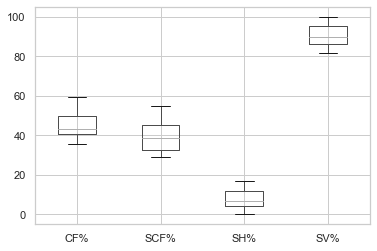

In [105]:
CanucksAfterFinal.boxplot(['CF%','SCF%','SH%','SV%'])

<AxesSubplot:>

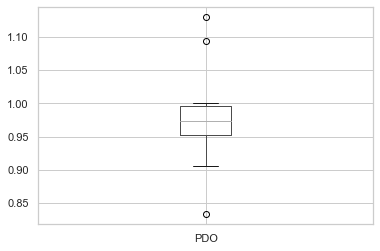

In [108]:
CanucksAfterFinal.boxplot(['PDO'])

### Buffalo Sabres Before Covid-19 Outbreak

In [116]:
CovidDescribeSBF

,count,mean,std,min,25%,50%,75%,max
CF%,10.0,50.6840,5.281671,41.670,49.08000,51.110,53.25500,59.380
SCF%,10.0,51.6020,9.615050,36.360,45.07500,54.860,57.49500,63.330
SH%,10.0,6.7640,4.886915,0.000,4.40000,5.835,10.39750,13.640
SV%,10.0,90.7250,4.427581,80.950,88.80000,90.890,93.97250,96.150
PDO,10.0,0.9749,0.053733,0.915,0.93125,0.965,1.01025,1.081


/var/folders/bj/1qb21b6n1nlcg8tl_ls_mjrm0000gn/T/ipykernel_54342/3791940207.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  SabresBeforeFinal.mean().plot(kind='bar')


<AxesSubplot:>

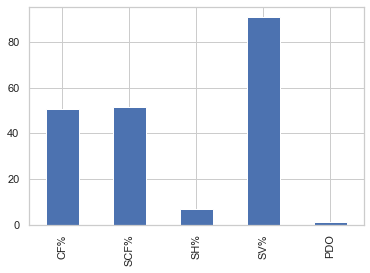

In [107]:
SabresBeforeFinal.mean().plot(kind='bar')

<AxesSubplot:>

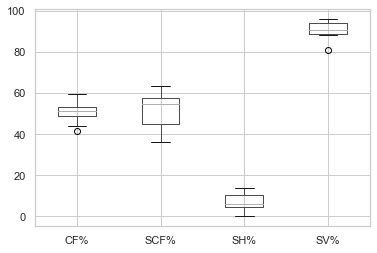

In [112]:
SabresBeforeFinal.boxplot(['CF%','SCF%','SH%','SV%'])

<AxesSubplot:>

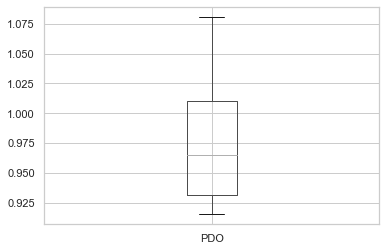

In [109]:
SabresBeforeFinal.boxplot(['PDO'])

### Buffalo Sabres After Covid-19 Outbreak

In [117]:
CovidDescribeSAF

,count,mean,std,min,25%,50%,75%,max
CF%,10.0,48.9230,6.687160,40.450,44.72000,47.655,49.69500,63.220
SCF%,10.0,46.4470,9.767542,26.670,41.17000,47.370,52.95250,60.000
SH%,10.0,3.2890,3.866110,0.000,0.00000,2.175,5.77500,10.530
SV%,10.0,91.8450,4.611566,82.350,90.32000,91.240,94.07500,100.000
PDO,10.0,0.9514,0.056714,0.895,0.90725,0.935,0.97425,1.063


/var/folders/bj/1qb21b6n1nlcg8tl_ls_mjrm0000gn/T/ipykernel_54342/45042282.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  SabresAfterFinal.mean().plot(kind='bar')


<AxesSubplot:>

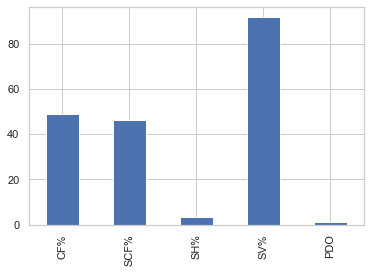

In [110]:
SabresAfterFinal.mean().plot(kind='bar')

<AxesSubplot:>

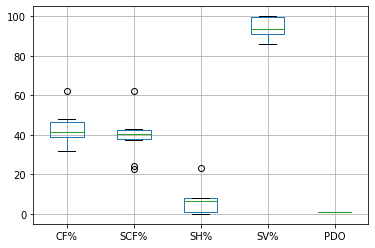

In [19]:
SabresAfter.boxplot(['CF%','SCF%','SH%','SV%','PDO'])

<AxesSubplot:>

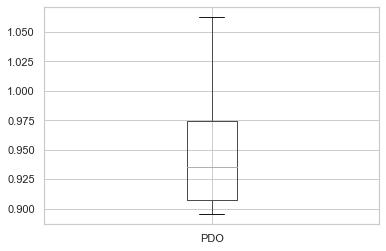

In [113]:
SabresAfterFinal.boxplot(['PDO'])